<a href="https://colab.research.google.com/github/NicoGajardo/MachineLearning/blob/main/Tarea_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!



#PASO 1 Obtención de datos

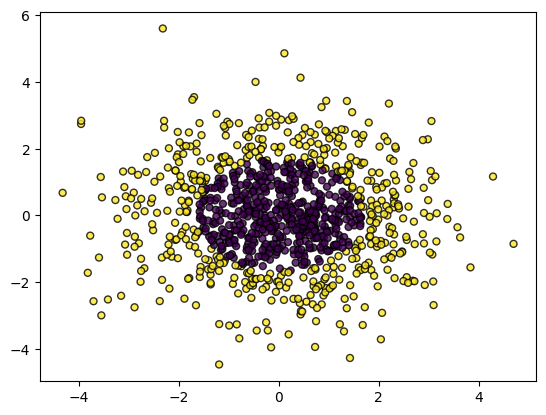

In [2]:
#create two gaussian distributions using make_gaussian_quantiles

from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

#generate 2D normally distributed data
X1, Y1 = make_gaussian_quantiles(cov=2.,
                                    n_samples=1000, n_features=2,
                                    n_classes=2, random_state=1)

# plot  data. Seaborn, blue a red color, transparency.

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k', alpha=0.8)
plt.show()

# PASO 2: Manipulación de datos


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4, random_state=42)

print(f"Dimensiones del conjunto de entrenamiento: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Dimensiones del conjunto de prueba: X_test={X_test.shape}, y_test={y_test.shape}")
print(f"Dimensiones del conjunto de validación: X_val={X_val.shape}, y_val={y_val.shape}")

Dimensiones del conjunto de entrenamiento: X_train=(700, 2), y_train=(700,)
Dimensiones del conjunto de prueba: X_test=(180, 2), y_test=(180,)
Dimensiones del conjunto de validación: X_val=(120, 2), y_val=(120,)


#PASO 3: Exploración de Datos

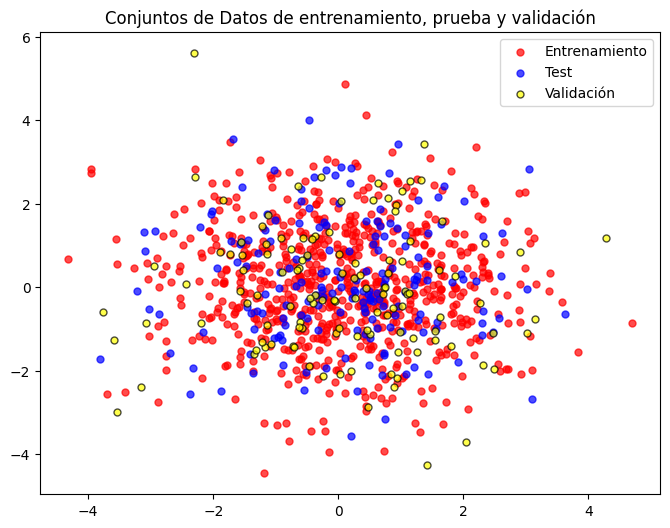

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c='red', label='Entrenamiento', s=25, alpha=0.7)
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', label='Test', s=25, alpha=0.7)
plt.scatter(X_val[:, 0], X_val[:, 1], c='yellow', label='Validación', edgecolor='k', s=25, alpha=0.7)

plt.title('Conjuntos de Datos de entrenamiento, prueba y validación')
plt.legend()
plt.show()

# PASO 4: Modelamiento de Datos (Machine Learning)

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_clf = SVC(kernel='rbf', gamma='scale', C=1, random_state=42)
svm_clf.fit(X_train, y_train)

y_pred_val = svm_clf.predict(X_val)

print("Estadísticas de Clasificación en el conjunto de validación:")
print(classification_report(y_val, y_pred_val))
print("Matriz de Confusión en el conjunto de validación:")
print(confusion_matrix(y_val, y_pred_val))

# Ajuste Parámetro C
svm_C5 = SVC(kernel='rbf', gamma='scale', C=5, random_state=42)
svm_C5.fit(X_train, y_train)
y_pred_val_C5 = svm_C5.predict(X_val)

svm_C_1 = SVC(kernel='rbf', gamma='scale', C=0.1, random_state=42)
svm_C_1.fit(X_train, y_train)
y_pred_val_C_1 = svm_C_1.predict(X_val)

print("Estadísticas de Clasificación C=5:")
print(classification_report(y_val, y_pred_val_C))
print("Matriz de Confusión:")
print(confusion_matrix(y_val, y_pred_val_C))

print("Estadísticas de Clasificación C=0.1:")
print(classification_report(y_val, y_pred_val_C_1))
print("Matriz de Confusión:")
print(confusion_matrix(y_val, y_pred_val_C_1))

# Ajuste Parámetro gamma

svm_gamma_a = SVC(kernel='rbf', gamma='auto', C=1.0, random_state=42)
svm_gamma_a.fit(X_train, y_train)
y_pred_val_gamma_a = svm_gamma_a.predict(X_val)

print("Estadísticas de Clasificación gamma auto:")
print(classification_report(y_val, y_pred_val_gamma_a))
print("Matriz de Confusión:")
print(confusion_matrix(y_val, y_pred_val_gamma_a))

svm_gamma_01 = SVC(kernel='rbf', gamma=0.01, C=1.0, random_state=42)
svm_gamma_01.fit(X_train, y_train)
y_pred_val_gamma_01 = svm_gamma_01.predict(X_val)

print("\nEstadísticas de Clasificación gamma=0.01:")
print(classification_report(y_val, y_pred_val_gamma_01))
print("Matriz de Confusión :")
print(confusion_matrix(y_val, y_pred_val_gamma_01))


Estadísticas de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.98      0.98      0.98        62

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Matriz de Confusión en el conjunto de validación:
[[57  1]
 [ 1 61]]
Estadísticas de Clasificación C=5:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       0.98      0.95      0.97        62

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

Matriz de Confusión:
[[57  1]
 [ 3 59]]
Estadísticas de Clasificación C=0.1:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       

#PASO 5: Interpretación de los Resultados

El clasificador SVM con kernel Gaussiano es adecuado para enfrentar problemas con un comportamiento no linealmente separable. La distribución inicial de los datos no presenta una discriminación clara para modelos de clasificación. Sin embargo, el kernle gaussiano es una herramienta poderosa para problemas de este comportamiento, donde permite separar los conjuntos de datos de manera más simple.

Los parámetros iniciales de entrenamiento demuestran un gran rendimiento con un f1-score de 0.98. Al ajustar los parámetros `C` y `gamma`, la variación del rendimiento es notoria para el caso del gamma de 0.01 con un accuracy de 0.78. Los demas casos de variaciones de C resultan una ligera disminución de la precisión sin afectar en gran medida las clasificaciones en la matríz de confusión. En este caso particular, los parámetros por defecto (`C=1.0`, `gamma='scale'`) parecen ofrecer el mejor rendimiento analizado, sin embargo es necesario realizar el estudio de parámetros para lograr el modelo óptimo en todos los casos de implementación de SVM.